In [1]:
library(Seurat)
library(RColorBrewer)
library(stringr)
library("clustree")
library(scales)

Loading required package: ggraph
Loading required package: ggplot2


In [2]:
t1 = read.csv("../Table/PPC_pilot_sequenced_samples.csv")[1:12,]
t1.temp = t1[! is.na(t1$PDX1_NKX61), ]
t1.temp = t1.temp[order(-t1.temp$PDX1_NKX61),]
t1.temp$UDID = gsub("_", "", t1.temp$UDID)
t1.temp = t1.temp[! t1.temp$UDID == "PPC069", ]

In [3]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.analyzed.filtered", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


In [4]:
tiss.filtered@meta.data$subject_collapsed = tiss.filtered@meta.data$label2
#matched fresh frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "C0005", "subject_collapsed"] = "C0005_PPC_PPC027"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "Q0115", "subject_collapsed"] = "Q0115_PPC_PPC023"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T104", "subject_collapsed"]  = "T104_PPC_PPC034"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T600", "subject_collapsed"]  = "T600_PPC_PPC029"

#only frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "P0353", "subject_collapsed"]  = "P0353_PPC_PPC150"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T151", "subject_collapsed"]   = "T151_PPC_PPC051"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "S02307", "subject_collapsed"] = "S02307_PPC_PPC134"


In [88]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(unique(umap$clusters)) > 8){colrs = data.frame(clusters = unique(umap$clusters), color = col_vector[1:length(unique(umap$clusters))])}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(umap)
    
}

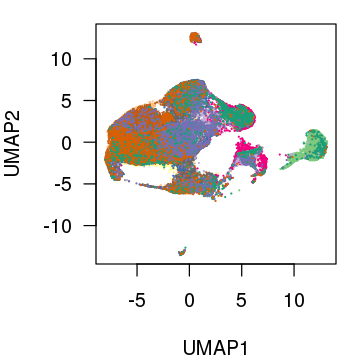

In [89]:
e = PlotUMAP(tiss.filtered, "subject_collapsed", -5, 12, text_width = 5, n.col = 3, plot_leg = F)

In [90]:
colors = e[! duplicated(e$clusters), ]

In [91]:
nullcols = rep("#bfbdbd00", length(colors$color))

In [97]:
PlotUMAPBySample <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL, mainName){

#     options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    colrs = data.frame(clusters = unique(umap$clusters), color = cols2use)

    umap$color <- "#bfbdbd"
    umap$colorTop = colrs[match(umap$clusters, colrs$clusters), "color"]

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1,
         main = mainName)
    
    points(umap[, 1], umap[, 2],
         pch = 19, 
         col = umap$colorTop,
         cex = .1,)

    

    
}

[1] "PPC051"

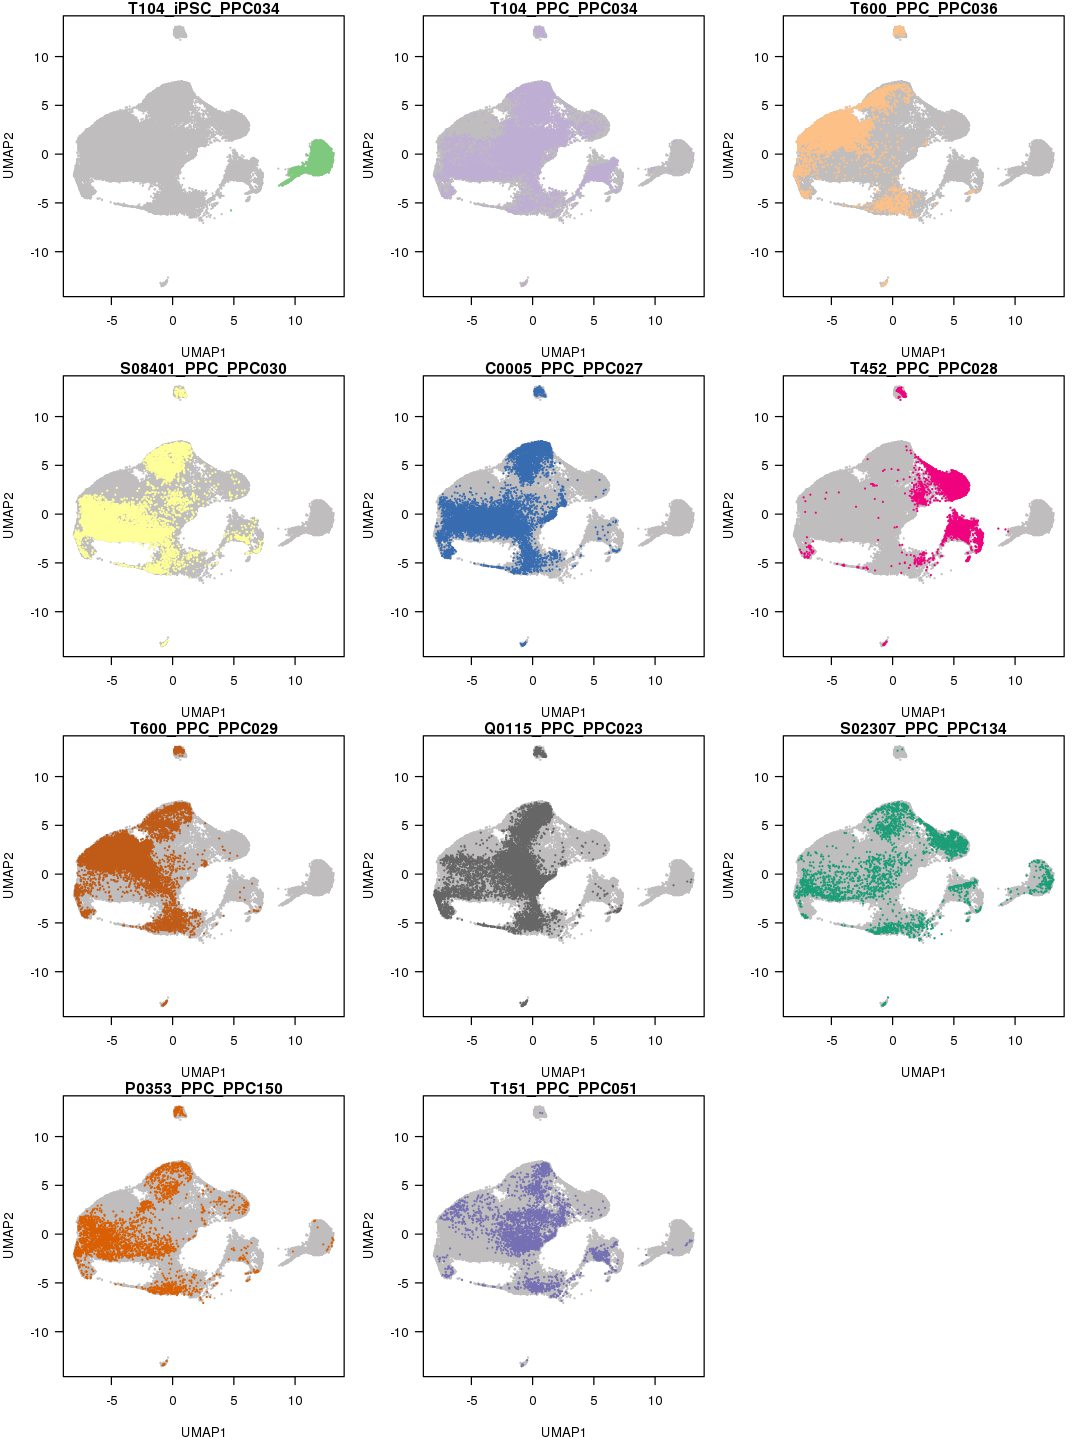

In [98]:
options(repr.plot.width = 9, repr.plot.height = 12)
par(mfrow = c(4, 3))

for( i in seq(1, length(colors$clusters))){

    cols.temp = nullcols
    cols.temp[i] <- colors[i, "color"]
    n = colors[i, "clusters"]
    n = str_split_fixed(n, "_", 3)[,3]
    PlotUMAPBySample(tiss.filtered, "subject_collapsed", -5, 12, text_width = 5, n.col = 3, plot_leg = F, cols2use = cols.temp, mainName = n)
     
}


In [103]:
out = "../Figures/Manuscript_V04/Figure_S2_"

png(paste(out, "UMAP_bySubject.png"), width = 9, height = 12, units = "in", res = 1200)

options(repr.plot.width = 9, repr.plot.height = 12)
par(mfrow = c(4, 3))

for( i in seq(1, length(colors$clusters))){

    cols.temp = nullcols
    cols.temp[i] <- colors[i, "color"]
    n = colors[i, "clusters"]
    n = str_split_fixed(n, "_", 3)[,3]
    PlotUMAPBySample(tiss.filtered, "subject_collapsed", -5, 12, text_width = 5, n.col = 3, plot_leg = F, cols2use = cols.temp, mainName = n)
     
}


dev.off()



png 
  2